### GROUP (101 TO 150) Assignment-1
Natural Language Processing (S1-21_DSECLZG525) - NLP Group 127 - SEC-2
1. Arindam Dey - 2020FC04251
2. Kaushik Dubey - 2020FC04245
3. SANATHANA SAI KUMAR - 2020FC04920

#### Question: I am a person looking for options to sell my products online, using platforms like Amazon. Right now I am not clear regarding what are the best products to invest in if I consider myself as a small investor (willing to invest up to 5 lakh Rupees) and so it is quite obvious I consider myself as a risk-averse investor.

I wish to perform sentiment analysis for product reviews from, say, Amazon, to select the best possible products for me.

Expected Answer:

Suggest Top five products for the investment bracket, with a detailed report using sentimental analysis on those product reviews. https://data.world/datasets/amazon

Refference: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.736.4819&rep=rep1&type=pdf https://www.commerce.ai/blog/amazon-product-review-analysis-the-ultimate-guide

## Sentiment analysis can be classified into three types.
### Predictive sentiment analysis
This type of sentiment analysis aims to predict how people will feel at a future date about a particular topic or product. For example, if we want to know how people will feel about a new phone in six months time, then we can use predictive sentiment analysis.

This type of sentiment analysis is not used for decision making, but rather for understanding behaviors in the future. One of the most common applications for predictive sentiment analysis is to predict a product’s financial performance. By using predictive sentiment analysis, product developers can measure the general public's interest in the product and make decisions accordingly (e.g., they can decide on the promotion strategy for the product).

### Diagnostic sentiment analysis
This type of sentiment analysis aims to understand how people are feeling about an object/topic right now by analyzing historical data on that object/topic. For example, when looking at how people felt about a particular brand over time, diagnostic sentiment analysis would help to determine whether there was an increase or decrease in positive feelings towards the brand over time.

This type of sentiment analysis is used to investigate problems and identify trends in data that affect decision making. While predictive sentiment analysis predicts how people will feel in the future, diagnostic sentiment analysis investigates problems and identifies trends in data that affect decision making. A popular example of this application is detecting harmful content online (e.g., detecting fake news).

### Sentiment classification
This type of sentiment analysis classifies texts with sentiments that are ambiguous or unknown.

Sentiment classification can be useful when trying to find out if a particular piece of text is positive or negative based on its content (e.g., whether a review accurately reflects its star-rating).

NLP techniques used in sentiment analysis
There are several techniques used for sentiment analysis. Let’s explore a few major options.

### Bag-of-words Bag-of-words sentiment analysis uses the frequency of positive and negative words in an article to determine its overall sentiment. It is an unstructured approach, meaning it does not rely on understanding the meaning of each word.

This approach has been criticized for being simplistic and not able to accurately identify sentiment.

### TF-IDF TF-IDF stands for Term Frequency-Inverse Document Frequency. This approach calculates the degree to which a word is present in an article, relative to how common it is in all articles.

TF-IDF sentiment analysis measures the importance of words in driving sentiment in an article and ignores words that are common in all documents. TF-IDF has been criticized for being computationally intensive and unable to accurately measure sentiment.

#### Word embeddings Word embeddings is a vector representation of natural language data using real values between -1 and +1. This approach calculates the degree to which words are present in an article, relative to how common they are in all articles.

### Word2Vec Word2Vec is an artificial neural network model, which maps words from text documents into vectors that are used as inputs for machine learning algorithms like regression or classification models.

In addition to mapping words into vectors, Word2Vec also predicts their probability distribution, making it possible to detect words with similar distributions but different spellings.

In [1]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import nltk
from nltk import FreqDist
nltk.download('stopwords') 
from nltk.corpus import stopwords

#https://spacy.io/usage
#pip install -U pip setuptools wheel
#pip install -U spacy
#python -m spacy download en_core_web_sm
#python -m spacy download en_core_web_trf
#pip install -U spacy[cuda114,transformers,lookups]
#pip install cupy-cuda115

import os
import tensorflow as tf
#from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix #, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
#from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bipla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(tf.__version__)

2.7.0


Load the attached csv file in python. Consists of columns crawl_timestamp billing_uniq_id rating review_title
review_rating
review_date user_id brand
category
sub_category
product_description asin
url review_content
verified_purchase
helpful_review_count
manufacturer_response

In [2]:
Data_DIR = 'D:/OneDrive/Certification/Bits Pilani Data Science/3rd Sem/Natural Language Processing (S1-21_DSECLZG525)/Assignment 1/'

In [3]:
data = pd.read_csv(Data_DIR+'amazon_com_product_reviews_20200101_20200331_sample.csv')

In [4]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'billing_uniq_id', 'rating',
       'review_title', 'review_rating', 'review_date', 'user_id', 'brand',
       'category', 'sub_category', 'product_description', 'asin', 'url',
       'review_content', 'verified_purchase', 'helpful_review_count',
       'manufacturer_response'],
      dtype='object')

In [5]:
data.head()

,uniq_id,crawl_timestamp,billing_uniq_id,rating,review_title,review_rating,review_date,user_id,brand,category,sub_category,product_description,asin,url,review_content,verified_purchase,helpful_review_count,manufacturer_response
0,10d8b81dc693db8a3f92e19254525d53,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Best Natural Deodorant!!,5.0,2020-03-06,AGIZFDSHLSBZ7KHQ4FV65W7B3HMQ,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R2Q...,This is the one natural deodorant that works f...,Verified Purchase,0,NaN
1,31ef1ee4961d3fcff33e363edd7677eb,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Schmidt's Charcoal Deodorant is the best!,5.0,2020-03-06,AHOZPYWO6WE5MLAZZPDUAWNKKNRQ,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R14...,I am staying away from the conventional deodor...,Verified Purchase,0,NaN
2,6943e517922b051cbec496be32fbb57f,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Beware. Defective or counterfeit.,1.0,2020-03-06,AECC6GYWWLNCKSBG3DZDGFSYDOTA,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R2R...,Do not buy this from Amazon it's either defect...,Verified Purchase,One person found this helpful Helpful,NaN
3,6778c794e6ac7112981d4ebb239d6826,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Good for infrequent shavers in cooler months i...,3.0,2020-03-05,AEOO6OOEO4QD7Z4F6C2FMZUCW7PA,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/RMI...,I started using this because I was getting cys...,NO,0,NaN
4,2335a28ae24db3b2191080bfd98a86e0,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,This isn’t the true product and will hurt your...,1.0,2020-03-02,AEHSDCGRIMVOUG6ST35FJ4FMMW5Q,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R1R...,Dont buy this from amazon!!!! I never write re...,Verified Purchase,One person found this helpful Helpful,NaN


In [6]:
data.shape

(50, 18)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uniq_id                50 non-null     object 
 1   crawl_timestamp        50 non-null     object 
 2   billing_uniq_id        50 non-null     object 
 3   rating                 0 non-null      float64
 4   review_title           50 non-null     object 
 5   review_rating          50 non-null     float64
 6   review_date            50 non-null     object 
 7   user_id                50 non-null     object 
 8   brand                  50 non-null     object 
 9   category               49 non-null     object 
 10  sub_category           49 non-null     object 
 11  product_description    49 non-null     object 
 12  asin                   50 non-null     object 
 13  url                    50 non-null     object 
 14  review_content         50 non-null     object 
 15  verified

In [8]:
data.isnull().sum()

uniq_id                   0
crawl_timestamp           0
billing_uniq_id           0
rating                   50
review_title              0
review_rating             0
review_date               0
user_id                   0
brand                     0
category                  1
sub_category              1
product_description       1
asin                      0
url                       0
review_content            0
verified_purchase         0
helpful_review_count      0
manufacturer_response    50
dtype: int64

In [9]:
uniqueTitles = data.review_title.unique()
uniqueTitles

array(['Best Natural Deodorant!!',
       "Schmidt's Charcoal Deodorant is the best!",
       'Beware. Defective or counterfeit.',
       'Good for infrequent shavers in cooler months in unimportant clothes',
       'This isn’t the true product and will hurt your armpits!',
       'A good choice for deodorant', 'Nice Smell',
       'Works OK but stains clothes', 'My skin hated it', 'My go to',
       'Yum', 'Yummy!', 'one of the best ones',
       'Just a tad different flavor.',
       'Wow Rapid Delivery and great product',
       'Will not irritate sensitive skin', 'Stink free', 'Too Scented',
       'Smells like "3 for .99c" soap, literally', 'Back Up Mr Onion!',
       'Not stinking', 'Interesting scent', 'Perfect and unisex!',
       'Finally one that works!', 'Horrible',
       'Just like it. Will buy again.', 'Wonderful soap!', 'Great soap',
       'Moisturizer', 'Great for the skin', 'This is my favorite soap',
       'It will dried your skin a a lot', 'Good Product',
       'D

In [10]:
len(uniqueTitles)

49

In [12]:
#Verified Purchase categorical
data.verified_purchase.unique()

array(['Verified Purchase', 'NO'], dtype=object)

In [13]:
#replace 1 and 0 in case of verified purchase
data["verified_purchase"] = np.where(data["verified_purchase"].str.contains("Verified Purchase"), 1, 0)

In [14]:
data.verified_purchase.unique()

array([1, 0])

In [15]:
# checking duplicates based on'asin', 'user_id' columns
data[data.duplicated(['user_id','asin'],keep= False)]

,uniq_id,crawl_timestamp,billing_uniq_id,rating,review_title,review_rating,review_date,user_id,brand,category,sub_category,product_description,asin,url,review_content,verified_purchase,helpful_review_count,manufacturer_response


In [16]:
good_rate = data[data.review_rating>=3]
bad_rate = data[data.review_rating<3]

# Printing rates and their total numbers
print ('Good ratings : {}'.format(len(good_rate)))
print ('Bad ratings : {}'.format(len(bad_rate)))

Good ratings : 42
Bad ratings : 8


In [17]:
#Average rating and helpfull rating
round(data.review_rating.mean(),3)

4.18

In [18]:
data.helpful_review_count.unique()

array(['0', 'One person found this helpful Helpful', '7', '2'],
      dtype=object)

In [19]:
data.helpful_review_count.replace('One person found this helpful Helpful', 1, inplace=True)

In [20]:
data.helpful_review_count = data.helpful_review_count.astype(int)

In [21]:
data_helpful = data[data.helpful_review_count.notnull()]

In [22]:
data.head()

,uniq_id,crawl_timestamp,billing_uniq_id,rating,review_title,review_rating,review_date,user_id,brand,category,sub_category,product_description,asin,url,review_content,verified_purchase,helpful_review_count,manufacturer_response
0,10d8b81dc693db8a3f92e19254525d53,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Best Natural Deodorant!!,5.0,2020-03-06,AGIZFDSHLSBZ7KHQ4FV65W7B3HMQ,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R2Q...,This is the one natural deodorant that works f...,1,0,NaN
1,31ef1ee4961d3fcff33e363edd7677eb,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Schmidt's Charcoal Deodorant is the best!,5.0,2020-03-06,AHOZPYWO6WE5MLAZZPDUAWNKKNRQ,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R14...,I am staying away from the conventional deodor...,1,0,NaN
2,6943e517922b051cbec496be32fbb57f,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Beware. Defective or counterfeit.,1.0,2020-03-06,AECC6GYWWLNCKSBG3DZDGFSYDOTA,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R2R...,Do not buy this from Amazon it's either defect...,1,1,NaN
3,6778c794e6ac7112981d4ebb239d6826,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Good for infrequent shavers in cooler months i...,3.0,2020-03-05,AEOO6OOEO4QD7Z4F6C2FMZUCW7PA,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/RMI...,I started using this because I was getting cys...,0,0,NaN
4,2335a28ae24db3b2191080bfd98a86e0,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,This isn’t the true product and will hurt your...,1.0,2020-03-02,AEHSDCGRIMVOUG6ST35FJ4FMMW5Q,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R1R...,Dont buy this from amazon!!!! I never write re...,1,1,NaN


In [23]:
#Average rating and helpfull rating
round(data_helpful.helpful_review_count.mean(),3)

0.4

In [24]:
#EDA
# Read statistic summary of numeric variables
data[['review_rating','helpful_review_count']].describe()

,review_rating,helpful_review_count
count,50.000000,50.000000
mean,4.180000,0.400000
std,1.409733,1.087968
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,7.000000


Text(0, 0.5, 'Number of Reviews')

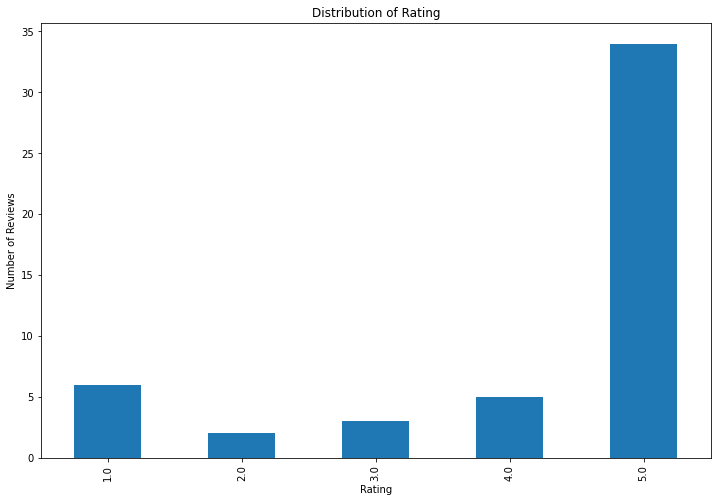

In [25]:
plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
data['review_rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

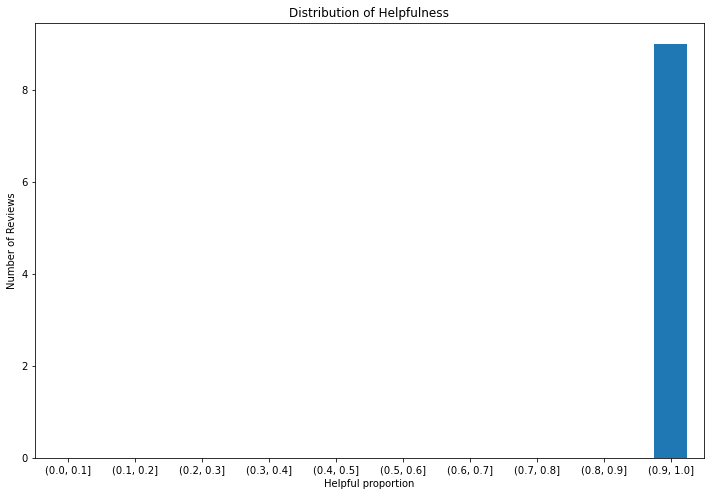

In [26]:
plt.figure(figsize=(12,8))

cutoff = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])


Dist_help = data.groupby([pd.cut(data['helpful_review_count'], bins = cutoff)]).size()
Dist_help.plot(kind='bar')

plt.title("Distribution of Helpfulness")
plt.xlabel("Helpful proportion")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

In [27]:
## DISTRIBUTION OF RATING SCORE
class_counts = data.groupby('review_rating').size()
class_counts

review_rating
1.0     6
2.0     2
3.0     3
4.0     5
5.0    34
dtype: int64

In [28]:
#That means customer like to give higher rating
# Customer totals for each rating class
data['verified_purchase'].value_counts()

1    46
0     4
Name: verified_purchase, dtype: int64

In [29]:
# Statistics of non-numeric variables

# Number of unique customers
print('\nNumber of unique customers : {}'.format(len(data['user_id'].unique())))
      
# Number of unique products
print('\nNumber of unique products : {}'.format(len(data['asin'].unique())))
      
# Review number per unique customer
print('\nReview per customer: {}'.format((len(data)/len(data['user_id'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(data)/len(data['asin'].unique()))))


Number of unique customers : 50

Number of unique products : 8

Review per customer: 1.0

Review per product: 6.25


Top 10 most reviewed:
          asin  reviewCnt
0  B007O0GQPC         10
1  B071YYMZ19         10
2  B07WDL82Z4         10
3  B07NQN58ZC          9
4  B005C2NA4E          5
5  B071WKSX1F          4
6  B00FYZJPAM          1
7  B07V3978XD          1 

count     8.000000
mean      6.250000
std       3.991061
min       1.000000
25%       3.250000
50%       7.000000
75%      10.000000
max      10.000000
Name: reviewCnt, dtype: float64


(-1.0, 10.0)

<Figure size 576x720 with 0 Axes>

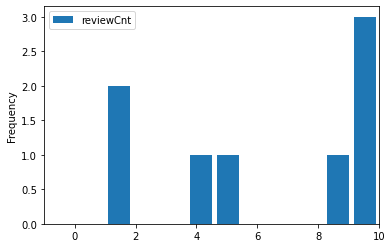

In [30]:
#Amazon Review Data
# number of asins, number of associated reviews for each asin
review_cnts = data.groupby('asin').agg({'review_content':'count'}).sort_values(by = 'review_content', ascending = False)
review_cnts = review_cnts.reset_index()
review_cnts = review_cnts.rename({'review_content':'reviewCnt'}, axis = 'columns')
print('Top 10 most reviewed:\n', review_cnts.head(10),'\n')
print(review_cnts.reviewCnt.describe())
plt.figure(figsize=(8,10))

# a few products are much more highly reviewed than the rest, zoom in to x < 200
review_cnts.plot.hist(by='reviewCnt', bins = 10, rwidth = 0.8)  
plt.xlim([-1,10])   # enmt: log y axis

In [31]:
# function to plot most frequent terms. This is used to gauge the quality of text processing
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

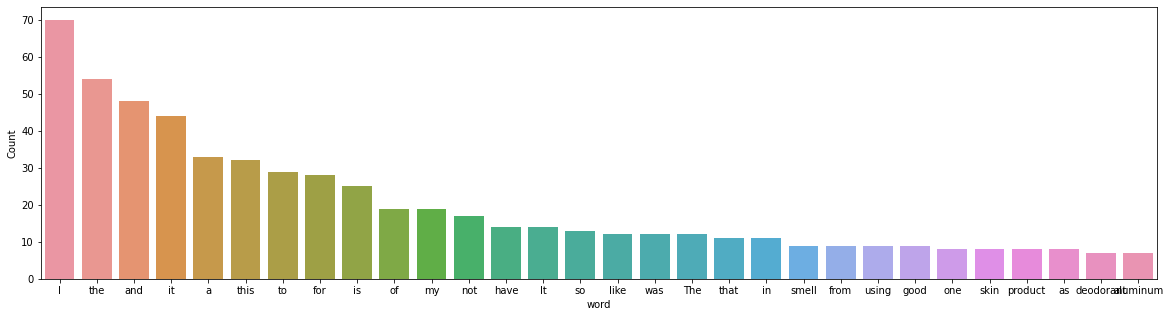

In [32]:
freq_words(list(data['review_content']))

Now imitating human nural understanding we understand words are the key here. Tokenization Parts of Speech Tagging Dependency Parsing Co-reference Resolution Named Entity Recognition Lemmatization

Most frequent nouns in the text from which commonly used words have been removed, will reveal the key-words (aspects) in the text

To implement this rule over a corpus of product review comments, following pre-processing will be needed. Extract word tokens from the corpus. Remove common words Extract all the nouns Find out top 5, most frequent nouns, these will be the key-words/aspects

## Text Preprocessing

In [33]:
def preprocess_data(data):
    # Remove columns as these not relevant
    data = data.drop('uniq_id', axis=1)
    data = data.drop('crawl_timestamp', axis=1)
    data = data.drop('billing_uniq_id', axis=1)
    data = data.drop('rating', axis=1)
    data = data.drop('review_date', axis=1)
    data = data.drop('user_id', axis=1)
    data = data.drop('product_description', axis=1)
    data = data.drop('url', axis=1)
    data = data.drop('manufacturer_response', axis=1)
    
    # Convert text to lowercase
    data['review_content'] = data['review_content'].str.strip().str.lower()
    return data

In [34]:
data = preprocess_data(data)
data.head()

,review_title,review_rating,brand,category,sub_category,asin,review_content,verified_purchase,helpful_review_count
0,Best Natural Deodorant!!,5.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,this is the one natural deodorant that works f...,1,0
1,Schmidt's Charcoal Deodorant is the best!,5.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,i am staying away from the conventional deodor...,1,0
2,Beware. Defective or counterfeit.,1.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,do not buy this from amazon it's either defect...,1,1
3,Good for infrequent shavers in cooler months i...,3.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,i started using this because i was getting cys...,0,0
4,This isn’t the true product and will hurt your...,1.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,dont buy this from amazon!!!! i never write re...,1,1


In [35]:
data["sentiment"] =  np.where(data["review_rating"] > 3, 1, 0)

In [36]:
data.head()

,review_title,review_rating,brand,category,sub_category,asin,review_content,verified_purchase,helpful_review_count,sentiment
0,Best Natural Deodorant!!,5.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,this is the one natural deodorant that works f...,1,0,1
1,Schmidt's Charcoal Deodorant is the best!,5.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,i am staying away from the conventional deodor...,1,0,1
2,Beware. Defective or counterfeit.,1.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,do not buy this from amazon it's either defect...,1,1,0
3,Good for infrequent shavers in cooler months i...,3.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,i started using this because i was getting cys...,0,0,0
4,This isn’t the true product and will hurt your...,1.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,dont buy this from amazon!!!! i never write re...,1,1,0


## Functions for Preprocessing
Expanding Contractions Contractions are shortened version of words or syllables. They exist in either written or spoken forms. Shortened versions of existing words are created by removing specific letters and sounds. In case of English contractions, they are often created by removing one of the vowels from the word.

By nature, contractions do pose a problem for NLP and text analytics because, to start with, we have a special apostrophe character in the word. Ideally, we can have a proper mapping for contractions and their corresponding expansions and then use it to expand all the contractions in our text.

Removing Special Characters One important task in text normalization involves removing unnecessary and special characters. These may be special symbols or even punctuation that occurs in sentences. This step is often performed before or after tokenization. The main reason for doing so is because often punctuation or special characters do not have much significance when we analyze the text and utilize it for extracting features or information based on NLP and ML.

Tokenizing Text Tokenization can be defined as the process of breaking down or splitting textual data into smaller meaningful components called tokens.

Sentence tokenization is the process of splitting a text corpus into sentences that act as the first level of tokens which the corpus is comprised of. This is also known as sentence segmentation , because we try to segment the text into meaningful sentences.

Word tokenization is the process of splitting or segmenting sentences into their constituent words. A sentence is a collection of words, and with tokenization we essentially split a sentence into a list of words that can be used to reconstruct the sentence.

Removing Stopwords Stopwords are words that have little or no significance. They are usually removed from text during processing so as to retain words having maximum significance and context. Stopwords are usually words that end up occurring the most if you aggregated any corpus of text based on singular tokens and checked their frequencies. Words like a, the , me , and so on are stopwords.

### Correcting Words One of the main challenges faced in text normalization is the presence of incorrect words in the text. The definition of incorrect here covers words that have spelling mistakes as well as words with several letters repeated that do not contribute much to its overall significance.

### Correcting Repeating Characters Correcting Spellings

# Lemmatization
The process of lemmatization is to remove word affixes to get to a base form of the word. The base form is also known as the root word, or the lemma, will always be present in the dictionary.

In [37]:
import re, string, unicodedata
import nltk
import contractions
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import contractions
#from contractions import contractions_dict

In [38]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text



# Define function to expand contractions
def expand_contractions(text):    
    return contractions.fix(text)


# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_non_ascii(words):
    #Remove non-ASCII characters from list of tokenized words
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    #Convert all characters to lowercase from list of tokenized words
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    #Remove punctuation from list of tokenized words
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    #Replace all interger occurrences in list of tokenized words with textual representation
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')


def remove_stopwords(words):
    #Remove stop words from list of tokenized words
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    #Stem words in list of tokenized words
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    #Lemmatize verbs in list of tokenized words
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

# Cleaning the Text

In [39]:
def normalize_and_lemmaize(input):
    sample = denoise_text(input)
    sample = expand_contractions(sample)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [40]:
data['clean_review'] = data['review_content'].map(lambda text: normalize_and_lemmaize(text))

In [41]:
data.head()

,review_title,review_rating,brand,category,sub_category,asin,review_content,verified_purchase,helpful_review_count,sentiment,clean_review
0,Best Natural Deodorant!!,5.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,this is the one natural deodorant that works f...,1,0,1,one natural deodorant work no bo smell through...
1,Schmidt's Charcoal Deodorant is the best!,5.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,i am staying away from the conventional deodor...,1,0,1,stay away conventional deodorants lot fragranc...
2,Beware. Defective or counterfeit.,1.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,do not buy this from amazon it's either defect...,1,1,0,not buy amazon either defective counterfeit us...
3,Good for infrequent shavers in cooler months i...,3.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,i started using this because i was getting cys...,0,0,0,start use get cysts aluminum antiperspirants s...
4,This isn’t the true product and will hurt your...,1.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,dont buy this from amazon!!!! i never write re...,1,1,0,not buy amazon never write review felt others ...


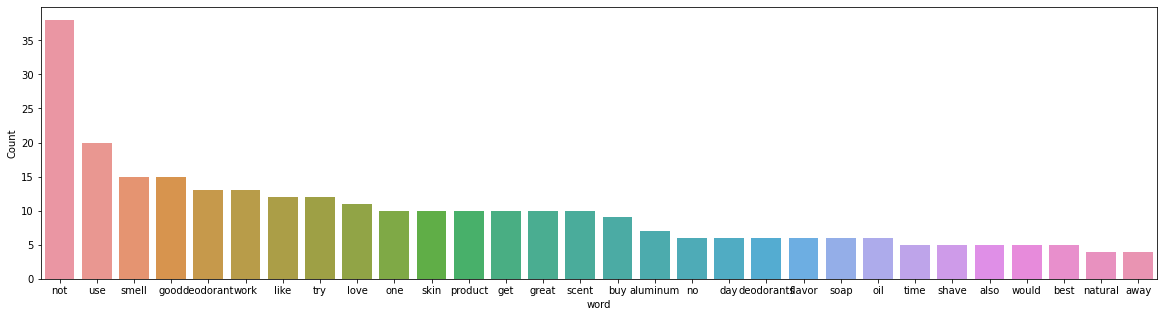

In [42]:
freq_words(list(data['clean_review']))

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review_title          50 non-null     object 
 1   review_rating         50 non-null     float64
 2   brand                 50 non-null     object 
 3   category              49 non-null     object 
 4   sub_category          49 non-null     object 
 5   asin                  50 non-null     object 
 6   review_content        50 non-null     object 
 7   verified_purchase     50 non-null     int32  
 8   helpful_review_count  50 non-null     int32  
 9   sentiment             50 non-null     int32  
 10  clean_review          50 non-null     object 
dtypes: float64(1), int32(3), object(7)
memory usage: 3.8+ KB


In [44]:
datapositive = data[data["review_rating"]>3]
datanegetive = data[data["review_rating"]<=3]

In [45]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unicodedata
#pip install contractions
import contractions
from contractions import contractions_dict
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bipla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bipla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bipla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
# calculate raw tokens in order to measure of cleaned tokens

from nltk.tokenize import word_tokenize
def tokenList(localdata):
    raw_tokens=[w for t in (localdata["review_content"].apply(word_tokenize)) for w in t]
    print('Number of raw tokens: {}'.format(len(raw_tokens)))
    print(raw_tokens)
    return raw_tokens

In [47]:
raw_token_positive = tokenList(datapositive)

Number of raw tokens: 1069
['this', 'is', 'the', 'one', 'natural', 'deodorant', 'that', 'works', 'for', 'me', ',', 'no', 'b.o', 'smell', 'throughout', 'the', 'day', '!', 'score', '.', 'although', 'it', 'will', 'never', 'absorb', 'quite', 'like', 'those', 'cancer', 'causing', 'deodorants', ',', 'this', 'is', 'definitely', 'a', 'must', 'buy', '!', '!', 'i', 'am', 'staying', 'away', 'from', 'the', 'conventional', 'deodorants', 'that', 'have', 'lots', 'of', 'fragrance', 'combined', 'with', 'aluminum', 'which', 'is', 'an', 'irritant', 'to', 'my', 'skin', 'and', 'bad', 'for', 'the', 'body', 'anyway', '.', 'in', 'my', 'search', 'for', 'a', 'product', 'that', 'smelled', 'fresh', 'enough', 'for', 'a', 'woman', 'to', 'use', 'and', 'one', 'that', 'worked', ',', 'i', 'came', 'upon', 'schmidt', "'s", 'charcoal', '.', 'i', 'was', 'pleasantly', 'surprised', '!', 'it', 'is', 'smooth', 'and', 'easy', 'to', 'put', 'on', ',', 'it', 'does', "n't", 'get', 'gloppy', 'like', 'some', ',', 'it', 'keeps', 'me',

In [48]:
raw_token_negetive = tokenList(datanegetive)

Number of raw tokens: 841
['do', 'not', 'buy', 'this', 'from', 'amazon', 'it', "'s", 'either', 'defective', 'or', 'counterfeit', '.', 'i', 'used', 'to', 'buy', 'the', 'same', 'product', 'at', 'costco', ',', 'it', 'works', 'great', '.', 'as', 'the', 'picture', 'shows', 'there', 'are', 'clumps', 'throughout', 'the', 'stick', 'and', 'it', 'causes', 'the', 'product', 'to', 'overapply', 'and', 'get', 'messy', '.', 'the', 'sticks', 'from', 'costco', 'were', 'smooth', 'and', 'worked', 'great', '.', 'i', 'started', 'using', 'this', 'because', 'i', 'was', 'getting', 'cysts', 'from', 'aluminum', 'antiperspirants', '.', 'after', 'studying', 'the', 'properties', 'of', 'charcoal', 'in', 'an', 'academic', 'setting', 'regarding', 'absorption', 'of', 'toxins', 'in', 'water', 'filtration', ',', 'i', 'decided', 'to', 'pick', 'this', 'aluminum', 'free', 'deodorant', '.', 'a', 'few', 'years', 'earlier', ',', 'i', 'tried', 'other', 'aluminum', 'free', 'deodorants', 'and', 'they', 'failed', 'miserably', '.'

In [51]:
# Let's put aside number of raw tokens in order to measure of cleaned tokens
from nltk.tokenize import word_tokenize
def cleanTokenList(localData, raw_tokens):
    clean_tokens=[w for t in (localData["clean_review"].apply(word_tokenize)) for w in t]
    print('Number of clean tokens: {}\n'.format(len(clean_tokens)))
    print('Percentage of removed tokens: {0:.2f}'.format(1-(len(clean_tokens)/len(raw_tokens))))
    print(clean_tokens)
    return clean_tokens

In [53]:
clean_token_positive = cleanTokenList(datapositive, raw_token_positive)

Number of clean tokens: 486

Percentage of removed tokens: 0.55
['one', 'natural', 'deodorant', 'work', 'no', 'bo', 'smell', 'throughout', 'day', 'score', 'although', 'never', 'absorb', 'quite', 'like', 'cancer', 'cause', 'deodorants', 'definitely', 'must', 'buy', 'stay', 'away', 'conventional', 'deodorants', 'lot', 'fragrance', 'combine', 'aluminum', 'irritant', 'skin', 'bad', 'body', 'anyway', 'search', 'product', 'smell', 'fresh', 'enough', 'woman', 'use', 'one', 'work', 'come', 'upon', 'schmidts', 'charcoal', 'pleasantly', 'surprise', 'smooth', 'easy', 'put', 'not', 'get', 'gloppy', 'like', 'keep', 'feel', 'fresh', 'day', 'long', 'work', 'price', 'worth', 'last', 'long', 'time', 'try', 'happy', 'great', 'natural', 'deodorant', 'work', 'great', 'sensitive', 'perfume', 'deorderants', 'nice', 'smell', 'work', 'great', 'deodorant', 'ever', 'use', 'anymore', 'no', 'similar', 'brand', 'compare', 'long', 'last', 'thing', 'actually', 'stop', 'odor', 'excellent', 'mustard', 'highly', 'recom

In [54]:
clean_token_negetive = cleanTokenList(datanegetive, raw_token_negetive)

Number of clean tokens: 369

Percentage of removed tokens: 0.56
['not', 'buy', 'amazon', 'either', 'defective', 'counterfeit', 'use', 'buy', 'product', 'costco', 'work', 'great', 'picture', 'show', 'clump', 'throughout', 'stick', 'cause', 'product', 'overapply', 'get', 'messy', 'stick', 'costco', 'smooth', 'work', 'great', 'start', 'use', 'get', 'cysts', 'aluminum', 'antiperspirants', 'study', 'properties', 'charcoal', 'academic', 'set', 'regard', 'absorption', 'toxins', 'water', 'filtration', 'decide', 'pick', 'aluminum', 'free', 'deodorant', 'years', 'earlier', 'try', 'aluminum', 'free', 'deodorants', 'fail', 'miserably', 'smell', 'good', 'mineraly', 'fresh', 'scent', 'sensitive', 'skin', 'especially', 'shave', 'go', 'dermatologist', 'think', 'serious', 'rash', 'burn', 'sensation', 'figure', 'deodorant', 'know', 'not', 'apply', 'deodorant', 'day', 'two', 'shave', 'reccomend', 'not', 'shave', 'often', 'also', 'stain', 'gray', 'oily', 'not', 'wear', 'thin', 'light', 'nice', 'clothe', '

In [55]:
#most common words 
from nltk import FreqDist

freq_dist_pos = FreqDist(clean_token_positive)
print(freq_dist_pos.most_common(100))

[('not', 16), ('use', 13), ('like', 10), ('love', 10), ('work', 9), ('smell', 9), ('scent', 8), ('one', 7), ('skin', 7), ('product', 7), ('try', 7), ('good', 7), ('deodorant', 6), ('buy', 6), ('get', 6), ('great', 6), ('oil', 6), ('best', 5), ('soap', 5), ('natural', 4), ('no', 4), ('day', 4), ('deodorants', 4), ('keep', 4), ('long', 4), ('brand', 4), ('far', 4), ('enough', 3), ('feel', 3), ('last', 3), ('since', 3), ('could', 3), ('also', 3), ('dry', 3), ('shower', 3), ('fabulous', 3), ('caramel', 3), ('definitely', 2), ('stay', 2), ('away', 2), ('lot', 2), ('combine', 2), ('aluminum', 2), ('body', 2), ('fresh', 2), ('schmidts', 2), ('smooth', 2), ('price', 2), ('time', 2), ('sensitive', 2), ('nice', 2), ('ever', 2), ('thing', 2), ('odor', 2), ('highly', 2), ('recommend', 2), ('taste', 2), ('delicious', 2), ('flavor', 2), ('bite', 2), ('usual', 2), ('different', 2), ('seem', 2), ('probably', 2), ('months', 2), ('still', 2), ('would', 2), ('yummy', 2), ('longer', 2), ('family', 2), ('e

## Preparing Data for the Model
Same can be achieved using Naive Bayes classifier Alternatively we can use spacy or Hugging Face kind of library where it uses pretrained NLP models

In [56]:
#we need good review tokens and bad review tokens
# Split into training and testing data
x = data['review_content']
y = data['sentiment']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [57]:
# Vectorize text reviews to numbers
from sklearn.feature_extraction.text import CountVectorizer
#CountVectorizer will transfor all into numerical machine understandable format
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

### Using Naive Bayes classifier

In [58]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

## Building and Testing the Model

In [59]:
model.score(x_test, y_test)

0.8461538461538461

In [60]:
data["sentimentScore"] =  model.predict(vec.transform(data["clean_review"]))

In [61]:
finalprds = data.drop(data[data["sentimentScore"] == 0].index)
finalprdtbl = finalprds.groupby("brand").sum()
finalprdtbl = finalprdtbl.sort_values(by=['sentimentScore'], ascending=False)
finalprdtbl.head(5)

,review_rating,verified_purchase,helpful_review_count,sentiment,sentimentScore
brand,,,,,
Schmidt's Deodorant,64.0,15,6,12,16
SheaMoisture,70.0,14,1,14,15
Talenti,35.0,7,4,7,7
Sir Kensingtons,19.0,4,0,4,4
DOVE WOMENS DEO,5.0,1,7,1,1


So top 5 products are

1. Schmidt's Deodorant
2. SheaMoisture
3. Talenti
4. Sir Kensingtons
5. DOVE WOMENS DEO

## Using Spacy pretrained NLP models

In [62]:
#Define a function to extract keywords
def get_aspects(x):
    doc=nlp(x) ## Tokenize and extract grammatical components
    #doc=[i.text for i in doc if i.text not in stopwords.words('english') and i.pos_=="NOUN"] ## Remove common words and retain only nouns
    #doc=list(map(lambda i: i.lower(),doc)) ## Normalize text to lower case
    #doc=pd.Series(doc)
    #doc=doc.value_counts().head().index.tolist() ## Get 5 most frequent nouns
    return doc

In [64]:
import spacy
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")
doc = nlp(data.clean_review[0])

print("======tokens======")
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)
print("======entities======")   
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

======tokens======
one one NUM CD nummod xxx True True
natural natural ADJ JJ amod xxxx True False
deodorant deodorant NOUN NN compound xxxx True False
work work NOUN NN nsubj xxxx True False
no no INTJ UH intj xx True True
bo bo INTJ UH compound xx True False
smell smell NOUN NN appos xxxx True False
throughout throughout ADP IN prep xxxx True True
day day NOUN NN compound xxx True False
score score NOUN NN pobj xxxx True False
although although SCONJ IN mark xxxx True True
never never ADV RB neg xxxx True True
absorb absorb VERB VB advcl xxxx True False
quite quite ADV RB advmod xxxx True True
like like ADP IN prep xxxx True False
cancer cancer NOUN NN compound xxxx True False
cause cause NOUN NN pobj xxxx True False
deodorants deodorant NOUN NNS nsubj xxxx True False
definitely definitely ADV RB advmod xxxx True False
must must AUX MD aux xxxx True True
buy buy VERB VB ROOT xxx True False
======entities======
one 0 3 CARDINAL


## Using Hugging Face pretrained NLP models

In [65]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
huggingDetails = data.apply(lambda x: sentiment_analysis(x.clean_review), axis = 1)

In [66]:
data["huggingfaceScore"] = huggingDetails.map(lambda hgf: hgf[0]['score'])
data["huggingfacesentiment"] = huggingDetails.map(lambda hgf: 1 if (hgf[0]['label'] == 'POSITIVE') else 0)

In [67]:
data.head()

,review_title,review_rating,brand,category,sub_category,asin,review_content,verified_purchase,helpful_review_count,sentiment,clean_review,sentimentScore,huggingfaceScore,huggingfacesentiment
0,Best Natural Deodorant!!,5.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,this is the one natural deodorant that works f...,1,0,1,one natural deodorant work no bo smell through...,1,0.998525,1
1,Schmidt's Charcoal Deodorant is the best!,5.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,i am staying away from the conventional deodor...,1,0,1,stay away conventional deodorants lot fragranc...,1,0.998904,1
2,Beware. Defective or counterfeit.,1.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,do not buy this from amazon it's either defect...,1,1,0,not buy amazon either defective counterfeit us...,0,0.996690,1
3,Good for infrequent shavers in cooler months i...,3.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,i started using this because i was getting cys...,0,0,0,start use get cysts aluminum antiperspirants s...,0,0.999468,0
4,This isn’t the true product and will hurt your...,1.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,dont buy this from amazon!!!! i never write re...,1,1,0,not buy amazon never write review felt others ...,0,0.999479,0


### So Now sort desc with positive feedback will give top 5 product

In [68]:
huggingfaceData = data.drop(data[data["huggingfacesentiment"] == 0].index)
huggingfaceData = huggingfaceData.sort_values(by=['huggingfaceScore', 'huggingfacesentiment'], ascending=False)

In [69]:
huggingfaceData

,review_title,review_rating,brand,category,sub_category,asin,review_content,verified_purchase,helpful_review_count,sentiment,clean_review,sentimentScore,huggingfaceScore,huggingfacesentiment
19,Back Up Mr Onion!,5.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B07WDL82Z4,i love this stuff. i tried so many different p...,1,1,1,love stuff try many different products toms ma...,1,0.998911,1
1,Schmidt's Charcoal Deodorant is the best!,5.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B071YYMZ19,i am staying away from the conventional deodor...,1,0,1,stay away conventional deodorants lot fragranc...,1,0.998904,1
14,Wow Rapid Delivery and great product,5.0,DOVE WOMENS DEO,Beauty & Personal Care,Personal Care,B07V3978XD,i have been using this product for several mon...,1,7,1,use product several months work not worry alum...,1,0.998899,1
16,Stink free,5.0,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,B07WDL82Z4,since it is not an anti-perspirant my armpits ...,1,0,1,since not antiperspirant armpits still get swe...,1,0.998869,1
34,Great value,5.0,SheaMoisture,Beauty & Personal Care,Skin Care,B007O0GQPC,really like this soap so far. been using it fo...,1,0,1,really like soap far use week great scent mois...,1,0.998826,1
49,The combined oils and scents are perfect!,5.0,SheaMoisture,Beauty & Personal Care,Skin Care,B005C2NA4E,i absolutely love this body oil! the combined ...,1,0,1,absolutely love body oil combine oil scent use...,1,0.998821,1
42,Wonderland Icecream Mix,5.0,Talenti,Grocery & Gourmet Food,Frozen,B07NQN58ZC,the best combination of chocolate & carmel sal...,1,1,1,best combination chocolate carmel salty sweet ...,1,0.998810,1
39,Heavenly 😋,5.0,Talenti,Grocery & Gourmet Food,Frozen,B07NQN58ZC,so delicious. i can only buy this every few mo...,1,0,1,delicious buy every months good eat,1,0.998804,1
12,one of the best ones,5.0,Sir Kensingtons,Grocery & Gourmet Food,Pantry Staples,B071WKSX1F,fantastic delicious i used it in everything si...,1,0,1,fantastic delicious use everything since could...,1,0.998800,1
10,Yum,5.0,Sir Kensingtons,Grocery & Gourmet Food,Pantry Staples,B071WKSX1F,"excellent mustard, i highly recommend",1,0,1,excellent mustard highly recommend,1,0.998787,1


In [70]:
uniqueBrands = huggingfaceData.brand.unique()
i=0
while i < 5:
    print(uniqueBrands[i])
    i += 1

Schmidt's Deodorant
DOVE WOMENS DEO
SheaMoisture
Talenti
Sir Kensingtons


## Conclusion:
We have done test and train data model building using NaiveBayesClassifier with tokens and used lemitization

We have used pretrained model of

Spacy
Hugging Face
Hugging face accuracy and result is best so drawing conclusion arround in below text.

1. Schmidt's Deodorant
2. DOVE WOMENS DEO
3. SheaMoisture
4. Talenti
5. Sir Kensingtons
These are best 5 item to invest for small investor according to sentiment analysis of review's

In [71]:
data.to_csv(Data_DIR+'processed.csv')